In [ ]:
import os
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
def load_images_from_folder(folder_path,target_size=(92,112)):
  images=[]
  labels=[]
  for subdir in os.listdir(folder_path):
    subfolder_path=os.path.join(folder_path,subdir)
    if not os.path.isdir(subfolder_path):
      continue

    label=int(subdir[1:])
    for filename in os.listdir(subfolder_path):
      image_path=os.path.join(subfolder_path,filename)
      image=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
      if image is not None:
        image=cv2.resize(image,target_size)
        images.append(image)
        labels.append(label)
  return np.array(images),np.array(labels)

dataset_folder="drive/MyDrive/ORL"
images,labels=load_images_from_folder(dataset_folder)
print("Number of images loaded",len(images))
print("Number of labels loaded",len(labels))

Number of images loaded 400
Number of labels loaded 400


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=42)


In [ ]:
X_train.shape

(320, 112, 92)

In [ ]:
X_test.shape

(80, 112, 92)

In [ ]:
nsamples, nx, ny=X_train.shape
d2_train_dataset=X_train.reshape((nsamples,nx*ny))
d2_train_dataset

array([[112, 115, 120, ...,  53,  53,  54],
       [ 48,  47,  47, ..., 120, 104,  66],
       [104, 106, 107, ...,  65,  59,  73],
       ...,
       [110, 106, 109, ...,  49,  53,  53],
       [108, 108, 111, ...,  64,  71,  75],
       [109, 111, 111, ...,  51,  50,  51]], dtype=uint8)

In [ ]:
nsamples, nx, ny=X_test.shape
d2_test_dataset=X_test.reshape((nsamples,nx*ny))
d2_test_dataset

array([[103, 109, 105, ...,  53,  58,  54],
       [133, 129, 133, ...,  15,  29,  26],
       [123, 124, 122, ...,  69,  71, 101],
       ...,
       [ 28,  25,  27, ..., 187, 187, 190],
       [105, 104, 102, ..., 173, 161, 122],
       [138, 135, 135, ...,  23,  18,  35]], dtype=uint8)

In [ ]:
n=80
pca=PCA(n_components=n,random_state=42)
X_train_pca=pca.fit_transform(d2_train_dataset)
X_test_pca=pca.transform(d2_test_dataset)

In [ ]:
svm_classifier=SVC()
svm_classifier.fit(X_train_pca,y_train)

SVC()

In [ ]:
y_pred=svm_classifier.predict(X_test_pca)
y_pred

array([38,  8, 25,  2,  8, 33, 24,  8, 37, 19,  4, 34, 14, 32, 31, 15,  3,
       12,  5,  7, 32, 36, 39, 40,  4, 39, 30, 11, 37, 20, 39, 22, 37, 14,
        5, 30, 30, 26,  1, 17,  7, 14, 32, 13, 33,  7, 17, 27, 13, 21, 15,
       24, 16, 32, 12, 40, 11, 21, 25,  1, 19, 35, 28, 32, 20, 25, 23, 37,
       39, 32, 24, 17,  4, 15,  7, 40, 11, 34, 21, 10])

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy',accuracy)

Accuracy 0.9625


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         4
           8       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         3
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         2
          21       1.00    

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 1]]


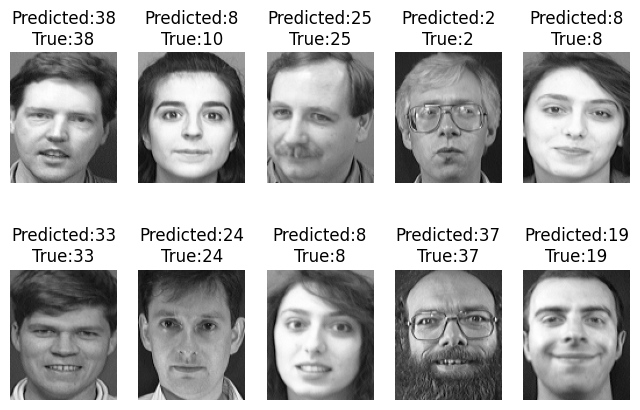

In [ ]:
plt.figure(figsize=(8,8))
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.imshow(X_test[i],cmap='gray')
  plt.title(f"Predicted:{y_pred[i]}\nTrue:{y_test[i]}")
  plt.axis('off')
plt.show()

In [ ]:
from skimage.io import imread
from skimage.transform import resize
pgm_image_path='drive/MyDrive/ORL/s35/4.pgm'
pgm_image=imread(pgm_image_path)
nsamples, nx, ny=(1,112,92)
flattened_image=pgm_image.reshape((nsamples,nx*ny))
image_pca=pca.transform(flattened_image)
predicted_label=svm_classifier.predict(image_pca)
predicted_label

array([35])

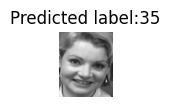

In [ ]:
plt.figure(figsize=(92,112))
for i,(image,label) in enumerate(zip(pgm_image,predicted_label)):
  plt.subplot(1,len(pgm_image),1)
  plt.imshow(pgm_image,cmap='gray')
  plt.title(f"Predicted label:{label}")
  plt.axis('off')
plt.show()